In [1]:
ruta = "../data/data_english/"
import pandas as pd 
data = pd.read_csv(ruta+"data.csv")
data.head()

,type,comment,clean_comment,word_count
0,infj,"the thing about dogs, they're better than peop...",the thing about dogs they re better than peopl...,655
1,enfp,"haha he's only 4 years older than me, so i hav...",haha he s only years older than me so i have a...,967
2,enfp,leahomme he was tested for university lemoni...,leahomme he was tested for university lemonice...,1241
3,istp,you need to come to canada! ||| you forgot thi...,you need to come to canada you forgot this.......,642
4,intp,'my ex invited me to her cheese and wine party...,my ex invited me to her cheese and wine party...,1478


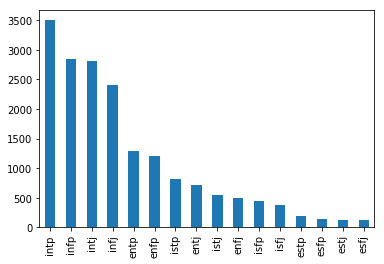

In [2]:
data["type"].value_counts().plot(kind="bar");

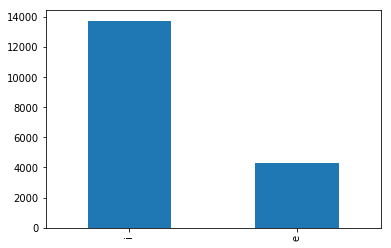

In [3]:
data["type"].apply(lambda x: x[0]).value_counts().plot(kind="bar");

### Code texts

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=5000, ngram_range=(1,3))
X_cv = vect.fit_transform(data["clean_comment"])
X_cv = pd.DataFrame(X_cv.toarray(), columns = vect.get_feature_names())

In [9]:
X_cv.head()

,ability,ability to,able,able to,about,about being,about her,about how,about it,about me,...,your mind,your own,your post,your type,yours,yourself,youtube,yup,zero,zone
0,0,0,1,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,2,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,1,0,0,...,0,0,1,0,0,1,2,0,0,0


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X_tfidf = vect.fit_transform(data["clean_comment"])
X_tfidf = pd.DataFrame(X_tfidf.toarray(), columns = vect.get_feature_names())

In [18]:
X_tfidf.head()

,ability,ability to,able,able to,about,about being,about her,about how,about it,about me,...,your mind,your own,your post,your type,yours,yourself,youtube,yup,zero,zone
0,0.0,0.0,0.028208,0.028522,0.039800,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.020743,0.020975,0.039024,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.018588,0.018795,0.017484,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.018035,0.027791,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.012794,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.021334,0.0,0.0,0.021416,0.0,0.0,...,0.0,0.0,0.025165,0.0,0.0,0.014670,0.045213,0.0,0.0,0.0


In [7]:
import sys
sys.path.append('../Utilities/')
from LIWC.LIWC_EN import LIWC_ENGLISH
X_LIWC = LIWC_ENGLISH(data["clean_comment"])

In [8]:
X_LIWC.head()

,function (Function Words),pronoun (Pronouns),ppron (Personal Pronouns),i (I),we (We),you (You),shehe (SheHe),they (They),ipron (Impersonal Pronouns),article (Articles),...,home (Home),money (Money),relig (Religion),death (Death),informal (Informal Language),swear (Swear),netspeak (Netspeak),assent (Assent),nonflu (Nonfluencies),filler (Filler Words)
0,0.462595,0.149618,0.080916,0.047328,0.001527,0.024427,0.004580,0.003053,0.068702,0.067176,...,0.000000,0.003053,0.001527,0.003053,0.013740,0.003053,0.003053,0.004580,0.003053,0.000000
1,0.558428,0.194416,0.125129,0.083764,0.003102,0.014478,0.012410,0.011375,0.069286,0.055843,...,0.000000,0.006205,0.008273,0.001034,0.013444,0.007239,0.001034,0.002068,0.003102,0.000000
2,0.478646,0.155520,0.104754,0.072522,0.012087,0.016116,0.003223,0.000806,0.050766,0.047542,...,0.008864,0.005641,0.001612,0.000000,0.019339,0.000806,0.010475,0.006446,0.000000,0.001612
3,0.482866,0.154206,0.102804,0.057632,0.003115,0.032710,0.006231,0.003115,0.051402,0.062305,...,0.003115,0.017134,0.000000,0.003115,0.018692,0.003115,0.006231,0.004673,0.004673,0.001558
4,0.531123,0.173207,0.121110,0.081867,0.002706,0.016238,0.008796,0.011502,0.051421,0.051421,...,0.001353,0.002030,0.000000,0.000000,0.006766,0.000000,0.000000,0.001353,0.004060,0.000000


### Stratified K Fold 5 with LGBM "balanced" and roc_auc score 

In [19]:
dict_code = {'i':0, 'e':1, 'n':0, 's':1, 'f':0, 't':1, 'j':0, 'p':1}
def code(tipo):
    """{'i':0, 'e':1, 'n':0, 's':1, 'f':0, 't':1, 'j':0, 'p':1} """
    return [dict_code[l] for l in tipo]

from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from tqdm.notebook import tqdm
def LGBM_KFOLD(splits,X,Y):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)

    f = 0
    scores = {}
    for i in range(4):
        scores[f"Y_{i}"] = []
    
    for train, test in kfold.split(X,Y):
        f+=1
    
        X_train,X_test = X.iloc[train].values,X.iloc[test].values
        Y_train,Y_test = Y.iloc[train],Y.iloc[test]
        
        for i in tqdm(range(4)):
            Y_n_train = [code(x)[i] for x in Y_train]
            Y_n_test = [code(x)[i] for x in Y_test]
            
            model = LGBMClassifier(class_weight="balanced")
            model.fit(X_train,Y_n_train)
            Y_pred = model.predict_proba(X_test)[:,1]
            score = roc_auc_score(Y_n_test,Y_pred)
            
            scores[f"Y_{i}"].append(score)

        print(f"KFOLD {f} Done")
    
    return pd.DataFrame(scores)  

# CV

In [11]:
resultados = LGBM_KFOLD(5, X_cv,data["type"])
print(resultados.describe())
resultados


KFOLD 1 Done



KFOLD 2 Done



KFOLD 3 Done



KFOLD 4 Done



KFOLD 5 Done
            Y_0       Y_1       Y_2       Y_3
count  5.000000  5.000000  5.000000  5.000000
mean   0.662692  0.656516  0.791028  0.640405
std    0.008634  0.009402  0.004615  0.006911
min    0.655466  0.645022  0.783133  0.634308
25%    0.656997  0.651741  0.790909  0.635176
50%    0.657104  0.655105  0.792721  0.638239
75%    0.669601  0.660868  0.794132  0.643230
max    0.674291  0.669846  0.794244  0.651075


,Y_0,Y_1,Y_2,Y_3
0,0.657104,0.655105,0.794132,0.635176
1,0.656997,0.660868,0.790909,0.638239
2,0.655466,0.651741,0.792721,0.651075
3,0.674291,0.645022,0.783133,0.634308
4,0.669601,0.669846,0.794244,0.643230


# TF

In [21]:
resultados = LGBM_KFOLD(5, X_tfidf,data["type"])
print(resultados.describe())
resultados


KFOLD 1 Done



KFOLD 2 Done



KFOLD 3 Done



KFOLD 4 Done



KFOLD 5 Done
            Y_0       Y_1       Y_2       Y_3
count  5.000000  5.000000  5.000000  5.000000
mean   0.656171  0.656572  0.788312  0.635755
std    0.003852  0.007248  0.006223  0.003224
min    0.652139  0.646666  0.778421  0.633300
25%    0.652255  0.651005  0.787839  0.634364
50%    0.657655  0.661120  0.788194  0.634590
75%    0.657872  0.661463  0.792576  0.635121
max    0.660932  0.662605  0.794529  0.641400


,Y_0,Y_1,Y_2,Y_3
0,0.657655,0.661463,0.787839,0.641400
1,0.652255,0.661120,0.788194,0.635121
2,0.657872,0.651005,0.794529,0.633300
3,0.660932,0.646666,0.778421,0.634590
4,0.652139,0.662605,0.792576,0.634364


# LIWC

In [13]:
resultados = LGBM_KFOLD(5, X_LIWC,data["type"])
print(resultados.describe())
resultados


KFOLD 1 Done



KFOLD 2 Done



KFOLD 3 Done



KFOLD 4 Done



KFOLD 5 Done
            Y_0       Y_1       Y_2       Y_3
count  5.000000  5.000000  5.000000  5.000000
mean   0.630212  0.606550  0.750429  0.587492
std    0.010028  0.007199  0.010193  0.008299
min    0.617123  0.596472  0.740635  0.576873
25%    0.626909  0.601960  0.741291  0.582383
50%    0.627661  0.609165  0.748372  0.588345
75%    0.635554  0.610959  0.758504  0.591372
max    0.643811  0.614193  0.763341  0.598485


,Y_0,Y_1,Y_2,Y_3
0,0.635554,0.610959,0.748372,0.576873
1,0.626909,0.601960,0.740635,0.582383
2,0.617123,0.614193,0.763341,0.591372
3,0.643811,0.609165,0.741291,0.598485
4,0.627661,0.596472,0.758504,0.588345


# Train and Save models

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = vect.fit_transform(data["clean_comment"])
X = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())

In [24]:
import pickle 
pickle.dump(vect, open( "count_vectorizer_english.pkl", "wb" ) )   # Save countvectorizer vect

In [25]:
from lightgbm import LGBMClassifier
for i in range(4):
    model =  LGBMClassifier(class_weight="balanced")
    model.fit(X.values,[x[i] for x in data["type"]])
    pickle.dump(model, open(f"LGBM_ENGLISH_{i}.pkl","wb"))  
    print(f"Done {i}")

Done 0
Done 1
Done 2
Done 3


In [31]:
import pickle 
def models():
    models = {}
    models["english"] = {}
    models["english"]["vect"] = pickle.load( open( "count_vectorizer_english.pkl", "rb" ) )
    
    for i in range(4):

        models["english"][f"LGBM{i}"] = pickle.load(open(f"LGBM_ENGLISH_{i}.pkl","rb") )
        
    return models 


modelos = models()

In [39]:
def get_personality(text,language, modelos):
    """['e' 'i']
    ['n' 's']
    ['f' 't']
    ['j' 'p']"""

    personality = []
    text_coded = modelos[language]["vect"].transform([text]).toarray()

    for i in range(4):
        model = modelos[language][f"LGBM{i}"]
        y_pred = model.predict_proba(text_coded)
        personality.append(y_pred)
        print(model.classes_)
            
    return personality

In [1]:
import pickle
vect = pickle.load( open( f"count_vectorizer_english.pkl", "rb" ) )

In [ ]:
from sklearn.externals import joblib
joblib.dump(vect, 'prueba.pkl')

In [ ]:
joblib.load("prueba.pkl")

In [ ]:
import joblib
joblib.load("prueba.pkl")